# Footballer Demographic Analysis 

## Introduction
This notebook presents a demographic analysis of professional football players using a comprehensive dataset. The goal is to explore key characteristics such as age, height, weight, nationality, preferred foot, and body type. By examining these features, we aim to understand the general physical profile and global distribution of players in modern football.

This analysis focuses purely on **who the players are**, not how they perform. It sets the foundation for deeper insights in future studies related to skills, market value, and performance metrics.

## Objective
The objective of this analysis is to examine the physical and demographic distribution of football players, identifying trends in age, physique, and global representation.

## Dataset Overview
- **Source:** [Kaggle Dataset](https://www.kaggle.com/datasets/davidcariboo/player-scores) by David Cariboo
  
- **Columns:** 'name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs','nationality', 'preferred_foot', 'body_type', etc.

- **Data Cutoff:** Dataset last retrieved from Kaggle on July 16th, 2025. Data cutoff unknown (Check the given link to find out more information).

## Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Reading the full CSV file 
The CSV file which I originally downloaded from Kaggle is a bit overkill for just analyzing the demographic features of footballers. So I had to filter some columns out to efficiently work with the data.

In [3]:
main_xtra = pd.read_csv("fifa_players.csv")

### Filtering necessary columns

In [4]:
main = main_xtra[['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs','nationality', 'preferred_foot', 'body_type']]

In [5]:
main.head(7)

,name,full_name,birth_date,age,height_cm,weight_kgs,nationality,preferred_foot,body_type
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,Argentina,Left,Messi
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,Denmark,Right,Lean
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,France,Right,Normal
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,Italy,Right,Normal
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,Senegal,Right,Normal
5,V. van Dijk,Virgil van Dijk,7/8/1991,27,193.04,92.1,Netherlands,Right,Normal
6,K. Mbappé,Kylian Mbappé,12/20/1998,20,152.40,73.0,France,Right,Lean


### Removing the rows which have null values in it

In [27]:
main = main.dropna()

### Checking for duplicated and null values

In [28]:
print(main.isna().sum())
print(main.duplicated().sum())

name              0
full_name         0
birth_date        0
age               0
height_cm         0
weight_kgs        0
nationality       0
preferred_foot    0
body_type         0
dtype: int64
0


There is no null or duplicated data in the dataset. 

## Exploratory Data Analysis (EDA)

### Plot-1: Age Distribution

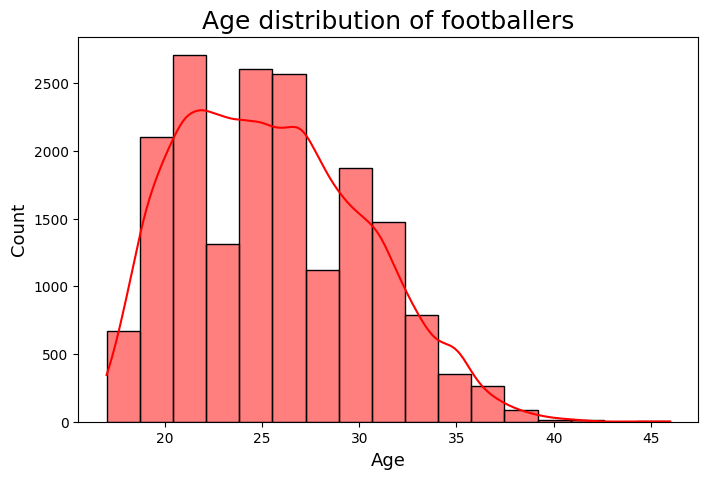

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(main["age"], bins=17, kde=True, color="red")
plt.xlabel("Age",fontdict={"fontsize":13})
plt.ylabel("Count",fontdict={"fontsize":13})
plt.title("Age distribution of footballers",fontdict={"fontsize":18})
plt.show()

### Observation

The histogram illustrates the age distribution of footballers, revealing a concentration of players within their early to late twenties. The distribution appears unimodal and right-skewed, with a prominent peak observed around 21-22 years of age, indicating a high frequency of players in this range. A secondary, slightly lower peak is noticeable around 25-26 years. The count of footballers gradually declines with increasing age, with a substantial drop-off observed beyond 30 years, and very few players extending into their forties. The overlaid kernel density estimate further emphasizes this trend, showcasing the highest density of players in the early to mid-twenties, consistent with the typical prime career years for professional footballers. This distribution suggests that while a significant number of players enter the professional arena in their late teens and early twenties, the active playing population diminishes considerably after their early thirties.

### Plot-2: Height vs Mass Scatter

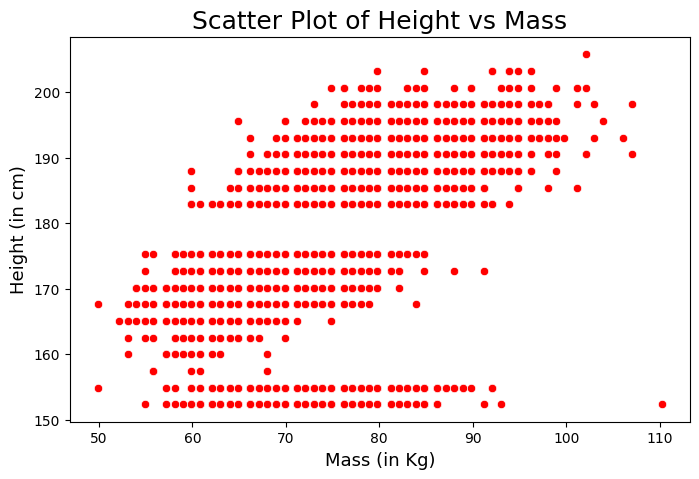

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=main,x="weight_kgs",y="height_cm",color="red")
plt.xlabel("Mass (in Kg)",fontdict={"fontsize":13})
plt.ylabel("Height (in cm)",fontdict={"fontsize":13})
plt.title("Scatter Plot of Height vs Mass",fontdict={"fontsize":18})
plt.show()

### Observation

The provided scatter plot illustrates the relationship between height (in cm) and mass (in Kg), revealing a general positive correlation between the two variables. As mass increases, there is a discernible trend of increasing height. However, the data points appear to cluster around specific height intervals, particularly around 155 cm, 165-175 cm, and 185-200 cm, suggesting the possibility of data granularity or distinct groups within the observed population. Within these clusters, there is a spread of mass values, indicating that individuals of similar height can have varying masses. The plot does not show a perfectly linear relationship, but rather a broadening of the mass range as height increases, indicating more variability in mass among taller individuals.

### Plot-3: Nationality Count Plot

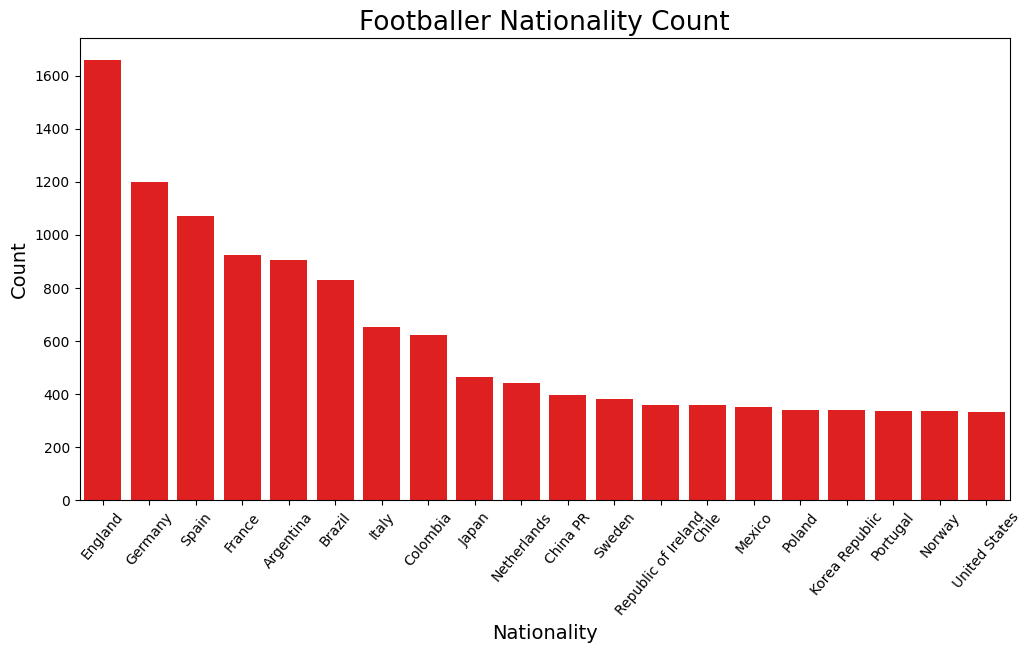

In [9]:
order = main["nationality"].value_counts(ascending=False).head(20).index
x = main[main["nationality"].isin(order)]
plt.figure(figsize=(12,6))
sns.countplot(x=x["nationality"],color="red",order=order)
plt.xlabel("Nationality",fontdict={"fontsize":14})
plt.ylabel("Count",fontdict={"fontsize":14})
plt.title("Footballer Nationality Count",fontdict={"fontsize":19})
plt.xticks(rotation=50)
plt.show()

### Observation

The bar chart displays the count of footballers by nationality, highlighting the most represented countries in the dataset. England clearly dominates with over 1600 footballers, followed by Germany and Spain, which also show high representation with counts exceeding 1000. France and Argentina are next, with counts in the 900-800 range. Brazil and Italy also exhibit significant numbers, each having over 600 footballers. Following these top-tier nations, there's a noticeable drop in the number of players from other countries, with Japan, Colombia, Netherlands, and China PR having counts between 300 and 500. The remaining countries shown, including Sweden, Republic of Ireland, Chile, Mexico, Poland, Korea Republic, Portugal, Norway, and the United States, all have similar representation, with counts generally ranging from approximately 300 to 350. Overall, we can clearly notice the dominance of European countries, which supports the profound history of football's foundation.

### Plot-4: Preferred Foot Distribution

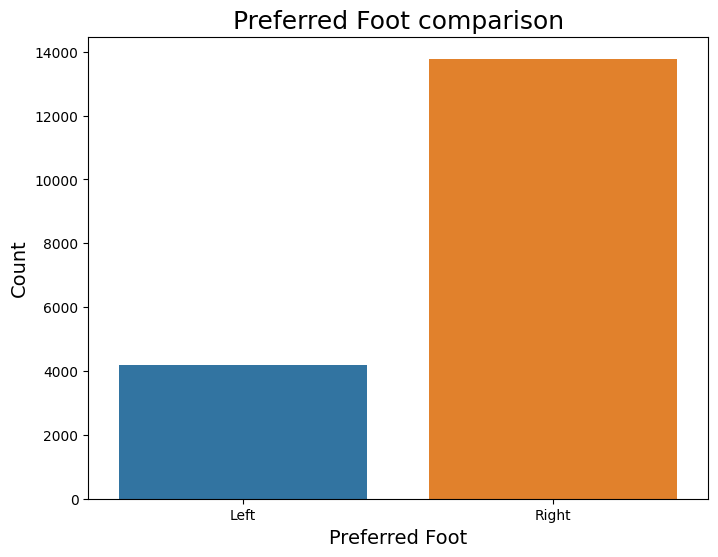

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=main,x="preferred_foot",hue="preferred_foot")
plt.xlabel("Preferred Foot",fontdict={"fontsize":14})
plt.ylabel("Count",fontdict={"fontsize":14}) 
plt.title("Preferred Foot comparison",fontdict={"fontsize":18})
plt.show()

### Observation
This countplot presents a comparative analysis between left-footed and right-footed footballers. The significant disparity in their numbers is evident. Approximately 14,000 right-footed players exist, while the left-footed player base stands at a mere 4,000. This visualization effectively illustrates the pronounced preference for right-footedness in the realm of football.

### Plot-5: Body Type Distribution

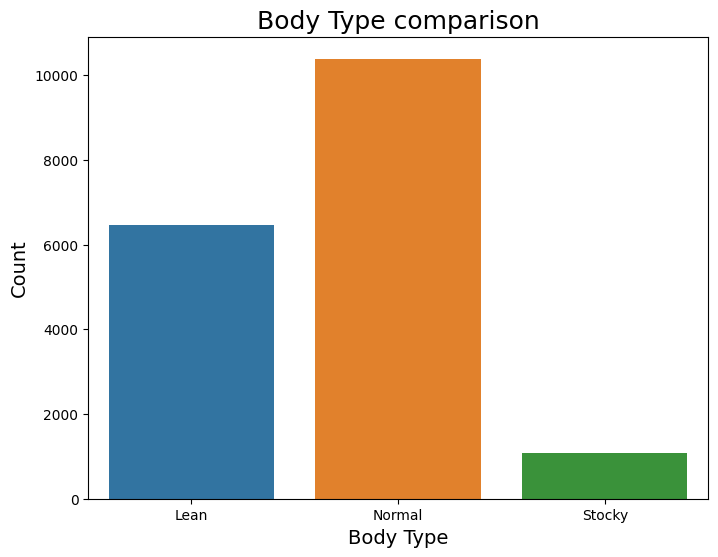

In [11]:
plt.figure(figsize=(8,6))
cut = main[main["body_type"].isin(["Lean","Normal","Stocky"])]
sns.countplot(x=cut["body_type"],hue=cut["body_type"])
plt.xlabel("Body Type",fontdict={"fontsize":14})
plt.ylabel("Count",fontdict={"fontsize":14}) 
plt.title("Body Type comparison",fontdict={"fontsize":18})
plt.show()

### Observation

The countplot presents a comparison of body types, categorizing individuals into "Lean," "Normal," and "Stocky." The "Normal" body type is overwhelmingly the most prevalent, with a count exceeding 10,000 individuals. The "Lean" body type represents the second largest group, with approximately 6,500 individuals. In stark contrast, the "Stocky" body type is the least common, with a count of roughly 1,000 individuals, significantly lower than the other two categories. This distribution indicates that the majority of the observed population falls within the "Normal" body type classification, followed by "Lean," with "Stocky" individuals being a distinct minority.

**Note:** The "body_type" values (e.g., Lean, Normal, Stocky) are taken directly from Transfermarkt’s scraped data. These categories are not based on standardized medical or scientific criteria. Instead, they likely reflect subjective or descriptive tags used on the site. As such, the analysis based on body type should be interpreted with caution.

## Statistical Analysis

### Statistical calculations of the main dataframe

In [12]:
main.describe()

,age,height_cm,weight_kgs
count,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047
std,4.705708,14.029449,7.083684
min,17.000000,152.400000,49.900000
25%,22.000000,154.940000,69.900000
50%,25.000000,175.260000,74.800000
75%,29.000000,185.420000,79.800000
max,46.000000,205.740000,110.200000


### Finding out the correlation matrix of player height, weight and age

In [13]:
targ = main[["age","height_cm","weight_kgs"]].corr()
targ

,age,height_cm,weight_kgs
age,1.000000,0.059579,0.233819
height_cm,0.059579,1.000000,0.495320
weight_kgs,0.233819,0.495320,1.000000



The correlation matrix shows weak relationships among age, height, and weight. Age and height have a negligible positive correlation (0.059579), while age and weight show a weak positive link (0.233819). The strongest correlation, between height and weight (0.495320), is moderate, suggesting taller individuals tend to weigh more, though not strongly. These weak associations indicate other factors likely influence these variables.

## Conclusion

### Key Takeaways

- **Age Distribution:** The majority of footballers are concentrated in their early to late twenties, with a peak around 21-22 years, and a noticeable decline in numbers after the age of 30, suggesting that prime career years are within this age bracket.

- **Physical Attributes (Height and Mass):** There is a general positive correlation between height and mass, indicating that taller footballers tend to be heavier. However, the data also shows clusters at specific height intervals (e.g., 155 cm, 165-175 cm, 185-200 cm), implying distinct body habitus groups, and within these height ranges, there is variability in mass.

- **Body Type Composition:** The "Normal" body type is the most prevalent among footballers, followed by "Lean," while the "Stocky" body type is significantly less common.

- **Nationality Representation:** Football is highly dominated by players from European countries, particularly England, Germany, and Spain, followed by other major footballing nations like France, Argentina, Brazil, and Italy.

- **Foot Dominance:** There is a significant prevalence of right-footed players, outnumbering left-footed players by a substantial margin.
  
- **Weak relationships between age, height and weight:** By using the *.corr* function, we have seen a weak correlation coefficient between the age, height, and weight of the footballers.

### Thanks :)

Thank you for spending your time to check this analysis out. I hope you found the information and insights interesting. Have a great day !

**Made By Sakib**